In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,8.27)})
# sns.set_context(rc={'lines.markeredgewidth': 0.2})

In [3]:
df = pd.read_csv("test_data.csv", parse_dates = ["date"])

In [4]:
df.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122097 entries, 0 to 122096
Data columns (total 10 columns):
time                 122097 non-null float64
event                122097 non-null object
ad_cost_type         122097 non-null object
has_video            122097 non-null int64
agency_union_id      122097 non-null object
client_union_id      122097 non-null object
campaign_union_id    122097 non-null object
ad_id                122097 non-null object
platform             122097 non-null object
date                 122097 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 9.3+ MB


In [6]:
df = df.drop_duplicates()

In [7]:
df.info() # После удаления дубликатов удалилось около 1300 значений. Вполне возможно, что это не ошибки,
          # а просто совпадения.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120961 entries, 0 to 122096
Data columns (total 10 columns):
time                 120961 non-null float64
event                120961 non-null object
ad_cost_type         120961 non-null object
has_video            120961 non-null int64
agency_union_id      120961 non-null object
client_union_id      120961 non-null object
campaign_union_id    120961 non-null object
ad_id                120961 non-null object
platform             120961 non-null object
date                 120961 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 10.2+ MB


In [8]:
df2 = pd.DataFrame(columns = ["interactions"])

In [9]:
df2["interactions"] = df.groupby("date").count()["event"]
df2.reset_index(inplace = True)

In [10]:
df2 = df2.rename(columns = {"date" : "day"})

In [11]:
df2

,day,interactions
0,2019-04-01,5172
1,2019-04-02,5269
2,2019-04-03,5357
3,2019-04-04,5108
4,2019-04-05,5289
5,2019-04-06,3954
6,2019-04-07,4091
7,2019-04-08,8848
8,2019-04-09,7941
9,2019-04-10,7078


/home/dmass/.local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


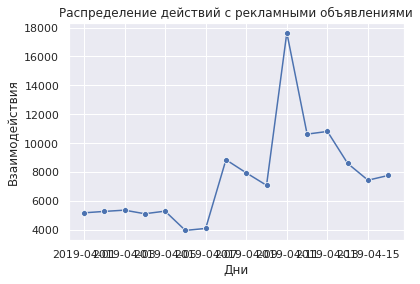

In [12]:
gr = sns.lineplot(x = "day", y = "interactions", marker="o", data = df2) # График иногда отображается маленьким 
gr.set(xlabel='Дни', ylabel='Взаимодействия')                            # и нужно перезапустить второй блок,
gr.set_title("Распределение действий с рекламными объявлениями")         # где происходит импорт seaborn
gr

In [13]:
df.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11


In [14]:
df11 = df.query("date == '2019-04-11'") # Анализируем 11-е число

In [15]:
df11.groupby("agency_union_id").count().sort_values("event", ascending = False)

,time,event,ad_cost_type,has_video,client_union_id,campaign_union_id,ad_id,platform,date
agency_union_id,,,,,,,,,
agency_2,13420,13420,13420,13420,13420,13420,13420,13420,13420
no_agency,2691,2691,2691,2691,2691,2691,2691,2691,2691
agency_158,105,105,105,105,105,105,105,105,105
agency_29,89,89,89,89,89,89,89,89,89
agency_33,81,81,81,81,81,81,81,81,81
agency_1589,67,67,67,67,67,67,67,67,67
agency_491,59,59,59,59,59,59,59,59,59
agency_77,51,51,51,51,51,51,51,51,51
agency_11,42,42,42,42,42,42,42,42,42


In [16]:
df_ag2 = df.query("agency_union_id == 'agency_2'") # Подозрительное агенство

In [17]:
df_ag2_count = df_ag2.groupby("date").count()
df_ag2_count


,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform
date,,,,,,,,,
2019-04-01,88,88,88,88,88,88,88,88,88
2019-04-02,115,115,115,115,115,115,115,115,115
2019-04-03,240,240,240,240,240,240,240,240,240
2019-04-04,226,226,226,226,226,226,226,226,226
2019-04-05,389,389,389,389,389,389,389,389,389
2019-04-06,154,154,154,154,154,154,154,154,154
2019-04-07,188,188,188,188,188,188,188,188,188
2019-04-08,4606,4606,4606,4606,4606,4606,4606,4606,4606
2019-04-09,3102,3102,3102,3102,3102,3102,3102,3102,3102


In [18]:
df_ag2_count.reset_index(inplace = True)
df_ag2_count

,date,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform
0,2019-04-01,88,88,88,88,88,88,88,88,88
1,2019-04-02,115,115,115,115,115,115,115,115,115
2,2019-04-03,240,240,240,240,240,240,240,240,240
3,2019-04-04,226,226,226,226,226,226,226,226,226
4,2019-04-05,389,389,389,389,389,389,389,389,389
5,2019-04-06,154,154,154,154,154,154,154,154,154
6,2019-04-07,188,188,188,188,188,188,188,188,188
7,2019-04-08,4606,4606,4606,4606,4606,4606,4606,4606,4606
8,2019-04-09,3102,3102,3102,3102,3102,3102,3102,3102,3102
9,2019-04-10,2176,2176,2176,2176,2176,2176,2176,2176,2176


In [19]:
df2.head()

,day,interactions
0,2019-04-01,5172
1,2019-04-02,5269
2,2019-04-03,5357
3,2019-04-04,5108
4,2019-04-05,5289


In [20]:
df2["agency_2"] = df_ag2_count.event
df2 = df2.rename(columns = {"interactions" : "overall"})
df2

,day,overall,agency_2
0,2019-04-01,5172,88
1,2019-04-02,5269,115
2,2019-04-03,5357,240
3,2019-04-04,5108,226
4,2019-04-05,5289,389
5,2019-04-06,3954,154
6,2019-04-07,4091,188
7,2019-04-08,8848,4606
8,2019-04-09,7941,3102
9,2019-04-10,7078,2176


In [21]:

df_gr = df2.melt(id_vars=['day'], value_vars=['overall', 'agency_2'], var_name='agency', value_name='interactions')
df_gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
day             32 non-null datetime64[ns]
agency          32 non-null object
interactions    32 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 848.0+ bytes


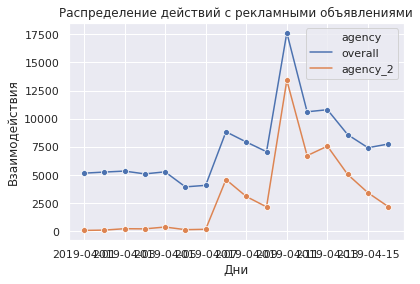

In [22]:
# Видим, что это агенство главным образом и повлияло на выброс
gr = sns.lineplot(x = "day", y = "interactions", marker="o", data = df_gr, hue = "agency")
gr.set(xlabel='Дни', ylabel='Взаимодействия')
gr.set_title("Распределение действий с рекламными объявлениями")
gr

In [23]:
df_ag2_11 = df.query("agency_union_id == 'agency_2' and date == '2019-04-11'")
df_ag2_11.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
16,1.555013e+09,view,CPC,0,agency_2,client_47269,campaign_47269,ad_47269,android,2019-04-11
19,1.555011e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
22,1.554977e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
25,1.554964e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49560,android,2019-04-11
43,1.554981e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11


In [24]:
df_ag2_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13420 entries, 16 to 122075
Data columns (total 10 columns):
time                 13420 non-null float64
event                13420 non-null object
ad_cost_type         13420 non-null object
has_video            13420 non-null int64
agency_union_id      13420 non-null object
client_union_id      13420 non-null object
campaign_union_id    13420 non-null object
ad_id                13420 non-null object
platform             13420 non-null object
date                 13420 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 1.1+ MB


In [25]:
df_ag2_11.groupby("client_union_id").count()

,time,event,ad_cost_type,has_video,agency_union_id,campaign_union_id,ad_id,platform,date
client_union_id,,,,,,,,,
client_47269,92,92,92,92,92,92,92,92,92
client_47270,13326,13326,13326,13326,13326,13326,13326,13326,13326
client_47296,2,2,2,2,2,2,2,2,2


In [26]:
df_cl270 = df.query("client_union_id == 'client_47270'") # Главный клиент агенства

In [27]:
df_cl270.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
10,1.554738e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49564,web,2019-04-08
11,1.555170e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-13
14,1.555252e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-14
19,1.555011e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
20,1.555061e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-12


In [28]:
df_cl270 = df_cl270.groupby("date").count()
df_cl270.reset_index(inplace = True)
df_cl270

,date,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform
0,2019-04-05,210,210,210,210,210,210,210,210,210
1,2019-04-08,4326,4326,4326,4326,4326,4326,4326,4326,4326
2,2019-04-09,2860,2860,2860,2860,2860,2860,2860,2860,2860
3,2019-04-10,1973,1973,1973,1973,1973,1973,1973,1973,1973
4,2019-04-11,13326,13326,13326,13326,13326,13326,13326,13326,13326
5,2019-04-12,6581,6581,6581,6581,6581,6581,6581,6581,6581
6,2019-04-13,7402,7402,7402,7402,7402,7402,7402,7402,7402
7,2019-04-14,4848,4848,4848,4848,4848,4848,4848,4848,4848
8,2019-04-15,3253,3253,3253,3253,3253,3253,3253,3253,3253
9,2019-04-16,1852,1852,1852,1852,1852,1852,1852,1852,1852


In [29]:
df_cl270_temp = df_cl270[["date", "event"]]
df_cl270_temp = df_cl270_temp.rename(columns={"date" : "day"})
df_cl270_temp

,day,event
0,2019-04-05,210
1,2019-04-08,4326
2,2019-04-09,2860
3,2019-04-10,1973
4,2019-04-11,13326
5,2019-04-12,6581
6,2019-04-13,7402
7,2019-04-14,4848
8,2019-04-15,3253
9,2019-04-16,1852


In [30]:
df2

,day,overall,agency_2
0,2019-04-01,5172,88
1,2019-04-02,5269,115
2,2019-04-03,5357,240
3,2019-04-04,5108,226
4,2019-04-05,5289,389
5,2019-04-06,3954,154
6,2019-04-07,4091,188
7,2019-04-08,8848,4606
8,2019-04-09,7941,3102
9,2019-04-10,7078,2176


In [31]:
df2 = df2.merge(df_cl270_temp, on="day", how = "left")
df2 = df2.rename(columns = {"event" : "client_47270"})
df2 = df2.fillna(0)
df2

,day,overall,agency_2,client_47270
0,2019-04-01,5172,88,0.0
1,2019-04-02,5269,115,0.0
2,2019-04-03,5357,240,0.0
3,2019-04-04,5108,226,0.0
4,2019-04-05,5289,389,210.0
5,2019-04-06,3954,154,0.0
6,2019-04-07,4091,188,0.0
7,2019-04-08,8848,4606,4326.0
8,2019-04-09,7941,3102,2860.0
9,2019-04-10,7078,2176,1973.0


In [32]:
df_gr = df2.melt(id_vars=['day'], value_vars=['overall', 'agency_2', 'client_47270'], var_name='advertiser', value_name='interactions')
df_gr

,day,advertiser,interactions
0,2019-04-01,overall,5172.0
1,2019-04-02,overall,5269.0
2,2019-04-03,overall,5357.0
3,2019-04-04,overall,5108.0
4,2019-04-05,overall,5289.0
5,2019-04-06,overall,3954.0
6,2019-04-07,overall,4091.0
7,2019-04-08,overall,8848.0
8,2019-04-09,overall,7941.0
9,2019-04-10,overall,7078.0


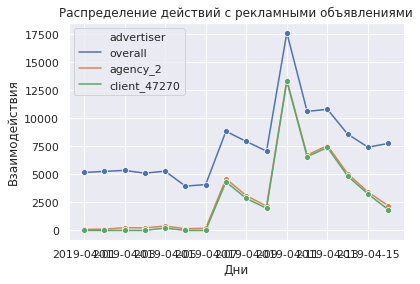

In [33]:
gr = sns.lineplot(x = "day", y = "interactions", marker="o", data = df_gr, hue = "advertiser")
gr.set(xlabel='Дни', ylabel='Взаимодействия')
gr.set_title("Распределение действий с рекламными объявлениями")
gr
#Клиент составляет основную часть рекламы агенства

In [34]:
df_cl270_11 = df.query("client_union_id == 'client_47270' and date == '2019-04-11'")

In [35]:
df_11 = df.query("date == '2019-04-11'")

In [36]:
df_cl270_11.head(10)

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
19,1.555011e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
22,1.554977e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
25,1.554964e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49560,android,2019-04-11
43,1.554981e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
44,1.554983e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
47,1.554994e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49556,android,2019-04-11
48,1.554984e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49556,android,2019-04-11
53,1.554980e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
60,1.554992e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
69,1.555002e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,web,2019-04-11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facbf5305c0>,
      dtype=object)

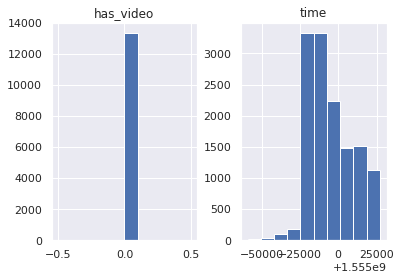

In [37]:
df_cl270_11.hist() # Подозрительные скачки...

In [38]:
from datetime import datetime
temp = df_cl270_11["time"].map(lambda x : datetime.fromtimestamp(x))
df_cl270_11["hours"] = temp.dt.hour

/home/dmass/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


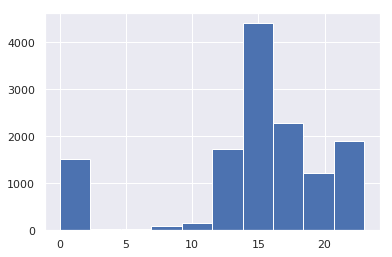

In [39]:
df_cl270_11["hours"].hist() # ...начиная с 15 часов

In [40]:
df_cl270_11_15 = df_cl270_11.query("hours == 15").sort_values("hours").sort_values("time")

In [41]:
df_cl270_11_15.sort_values("time") # Аномалии не очевидны

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,hours
26209,1.554984e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,15
78478,1.554984e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,15
103790,1.554984e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,15
104219,1.554984e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,mvk,2019-04-11,15
70897,1.554984e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,15
89448,1.554984e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,web,2019-04-11,15
75883,1.554984e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,15
69770,1.554984e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49560,android,2019-04-11,15
34814,1.554984e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,web,2019-04-11,15
96423,1.554984e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,mvk,2019-04-11,15


In [42]:
df_click = df.query("event == 'click'")

In [43]:
df_click.groupby("date").count() # Однако количество кликов осталось таким же, как и обычно.

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform
date,,,,,,,,,
2019-04-01,1827,1827,1827,1827,1827,1827,1827,1827,1827
2019-04-02,1898,1898,1898,1898,1898,1898,1898,1898,1898
2019-04-03,1837,1837,1837,1837,1837,1837,1837,1837,1837
2019-04-04,1871,1871,1871,1871,1871,1871,1871,1871,1871
2019-04-05,2175,2175,2175,2175,2175,2175,2175,2175,2175
2019-04-06,1576,1576,1576,1576,1576,1576,1576,1576,1576
2019-04-07,1510,1510,1510,1510,1510,1510,1510,1510,1510
2019-04-08,1543,1543,1543,1543,1543,1543,1543,1543,1543
2019-04-09,1781,1781,1781,1781,1781,1781,1781,1781,1781


In [44]:
df.query("event == 'view'").groupby("date").count()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform
date,,,,,,,,,
2019-04-01,2983,2983,2983,2983,2983,2983,2983,2983,2983
2019-04-02,3005,3005,3005,3005,3005,3005,3005,3005,3005
2019-04-03,3216,3216,3216,3216,3216,3216,3216,3216,3216
2019-04-04,2869,2869,2869,2869,2869,2869,2869,2869,2869
2019-04-05,2683,2683,2683,2683,2683,2683,2683,2683,2683
2019-04-06,2078,2078,2078,2078,2078,2078,2078,2078,2078
2019-04-07,2284,2284,2284,2284,2284,2284,2284,2284,2284
2019-04-08,6994,6994,6994,6994,6994,6994,6994,6994,6994
2019-04-09,5809,5809,5809,5809,5809,5809,5809,5809,5809


In [45]:
# Что мы имеем? Выбросы в данных, достигающие пика 11 апреля в 15 часов от одной компании, одного рекламодателя,
# одного(по большей части) приложения по модели CPC, при этом без увеличения числа кликов. 
# Если бы реклама действительно показывалась пользователям, мы наблюдали бы пропорциональное увеличение числа
# кликов, но его нет, что говорит нам о том, что произошла ошибка при сборе данных.

In [ ]:
# Алгоритм для определения аномалий

In [46]:
time = pd.Timestamp.now().value//10**9
five_mins = 5*60
one_hour = 60*60
one_day = one_hour*24
error_constant = 2.0
time

1556142796

In [47]:
df_inv = df.where(time-df.time<=one_day*10).dropna() # Заменить "one_day" нужным количеством секунд

In [48]:
time_click_df = pd.get_dummies(df_inv, columns = ["event"])
temp = time_click_df.groupby("date").sum()
vc_rate = temp["event_view"]/temp["event_click"]
vc_rate

date
2019-04-14    4.900000
2019-04-15    3.079793
2019-04-16    2.114494
dtype: float64

In [49]:
vc_rate.where(vc_rate>error_constant).dropna() # если view_count начинает сильно превышать click_count, мы имеем аномалию 

date
2019-04-14    4.900000
2019-04-15    3.079793
2019-04-16    2.114494
dtype: float64